# 1. 런던 자전거 수요 예측
https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

In [99]:
import numpy as np
import pandas as pd

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 결측치 시각화 라이브러리

In [3]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'])  # parse_dates: 날씨 및 시간 정보 파싱
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- "timestamp" - 데이터 그룹화를 위한 타임스탬프 필드
- "cnt" - 새 자전거 공유 횟수
- "t1" - 실제 온도(C)
- "t2" - 온도(C) "느낌"
- "윙윙" - 습도(%)
- "wind_speed" - 풍속(km/h)
- "weather_code" - 날씨 카테고리
- "is_holiday" - 부울 필드 - 1 휴일 / 0 비휴일
- "is_weekend" - 부울 필드 - 하루가 주말인 경우 1
- "계절" - 카테고리 필드 기상 계절: 0-봄; 1-여름; 2-가을; 3-겨울.
- "weathe_code" 카테고리 설명:
1 = 지우기 ; 대부분 맑으나 약간의 값이 있음/연무/안개/안개/안개가 주변에 있음 2 = 흩어진 구름/구름 거의 없음 3 = 흩어진 구름 4 = 흐림 7 = 비/약한 소나기/약한 비 10 = 천둥번개를 동반한 비 26 = 눈 94 = 얼어붙는 안개

## 1. EDA(탐색적데이터분석)

In [4]:
# 데이터 타입과 구조
print('데이터 구조:', df.shape)
print('데이터 타입:', df.dtypes)
print('데이터 컬럼:', df.columns)

데이터 구조: (17414, 10)
데이터 타입: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터 컬럼: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
# 카테고리 별 결측치 확인
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

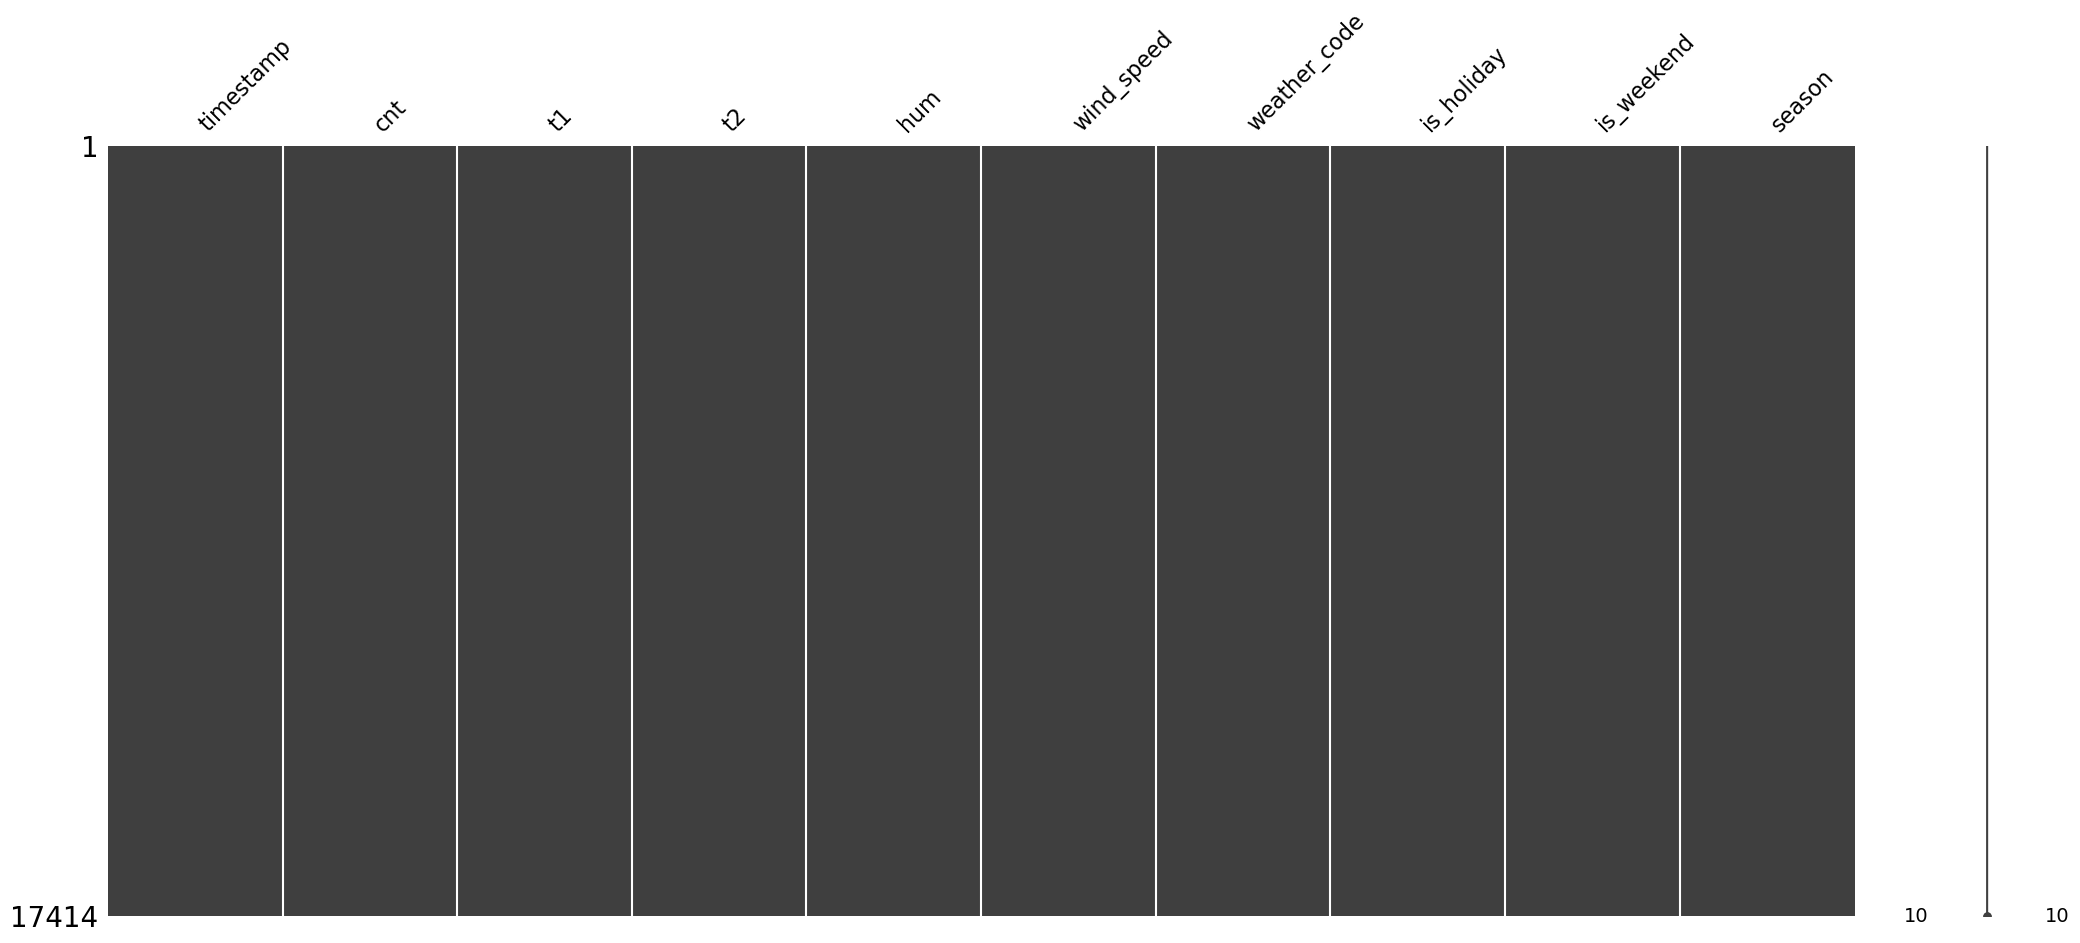

In [6]:
msno.matrix(df)  # 결측치는 하얀색으로 표현됨
plt.show()

In [7]:
df['year'] = df['timestamp'].dt.year            # 연도
df['month'] = df['timestamp'].dt.month          # 월
df['dayofweek'] = df['timestamp'].dt.dayofweek  # 요일
df['hour'] = df['timestamp'].dt.hour            # 시간
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [8]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [9]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

<Axes: xlabel='year', ylabel='cnt'>

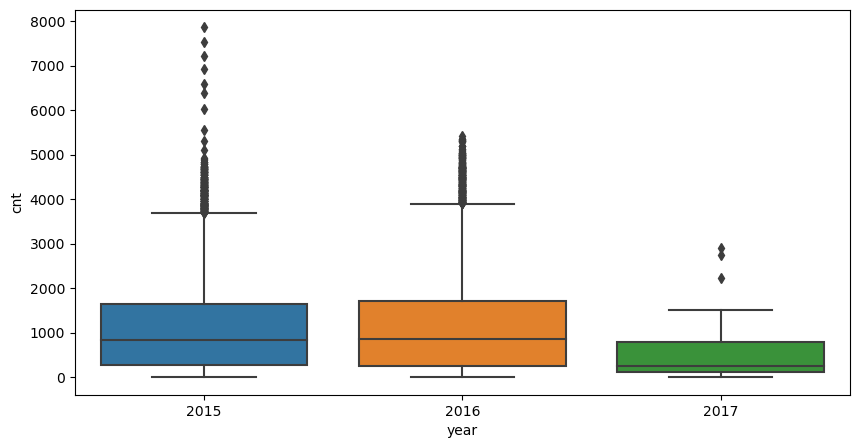

In [10]:
# 연도별 자전거 수요
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['year'], y=df['cnt'])

<Axes: xlabel='month', ylabel='cnt'>

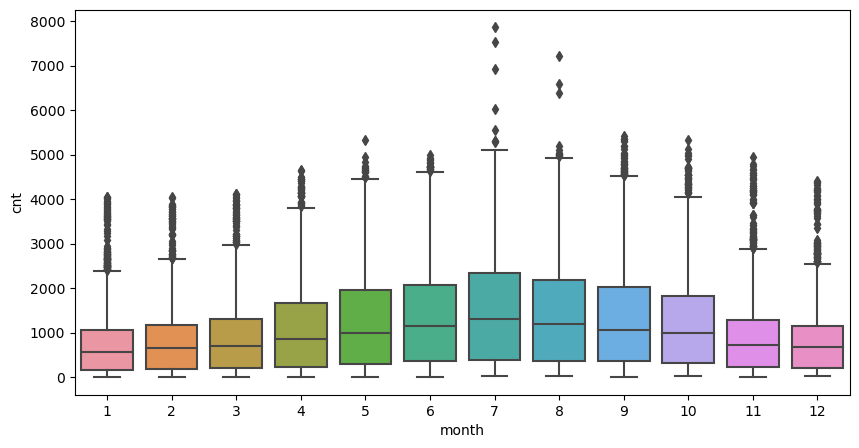

In [11]:
# 월별 자전거 수요
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['cnt'])

<Axes: xlabel='dayofweek', ylabel='cnt'>

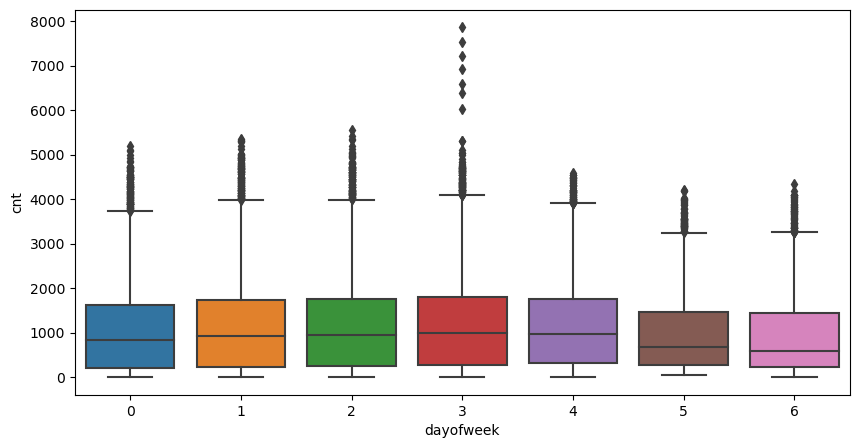

In [12]:
# 요일별 자전거 수요
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['dayofweek'], y=df['cnt'])

<Axes: xlabel='hour', ylabel='cnt'>

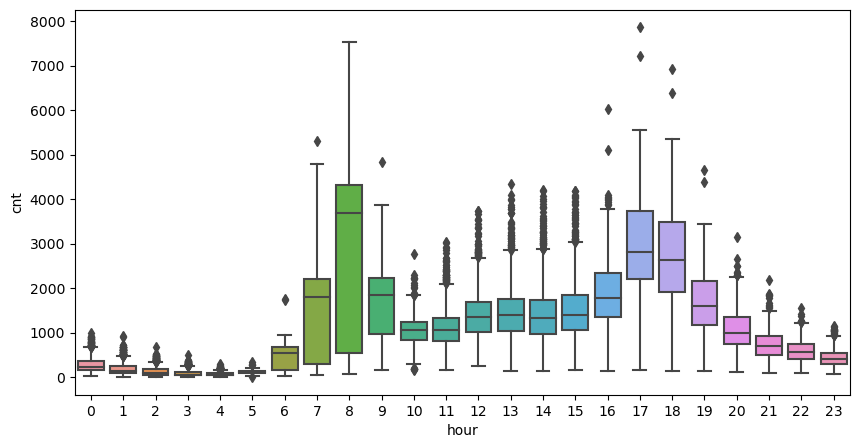

In [13]:
# 시간대별 자전거 수요
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x=df['hour'], y=df['cnt'])

In [14]:
# 그래프 함수 만들기
def plot_bar(data, feature):
    fig = plt.figure(figsize=(12, 3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

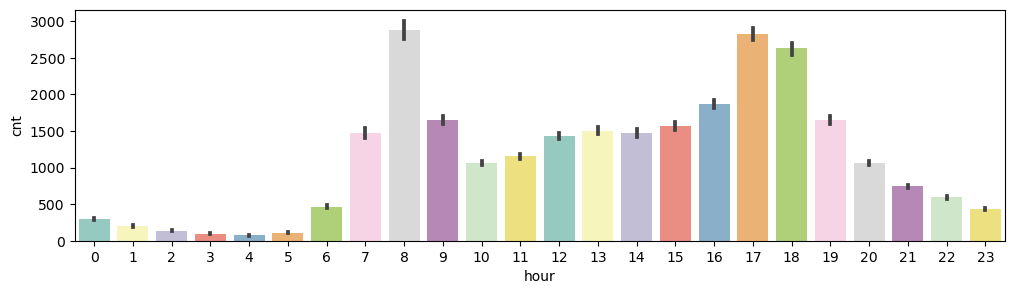

In [15]:
plot_bar(df, 'hour')

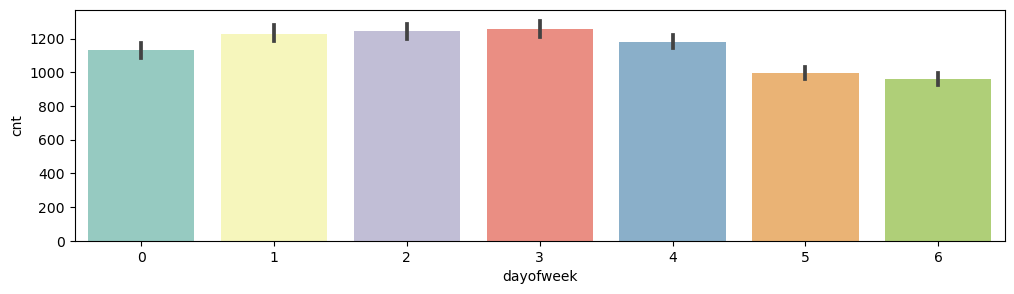

In [16]:
plot_bar(df, 'dayofweek')

## 2. 이상치(Outlier) 제거

### 시그마 이상치 제거
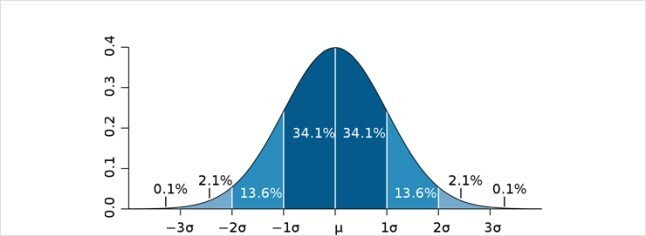
정규분포에서 데이터들이 ±3σ 안에 포함될 확률은 무려 99.7%인데 3 시그마 규칙이란 데이터가 ±3σ 밖에 존재할 확률은 0.3%이기 때문에 이 범위를 벗어나는 것은 이상치로 간주한다는 의미이다.

In [17]:
# 3 시그마 이상치 제거
def is_outliers(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)  # ~의 의미는 '역'의 의미를 갖는다

In [18]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거 전:', df.shape)
print('이상치 제거 후:', df_out.shape)

이상치 제거 전: (17414, 14)
이상치 제거 후: (17265, 14)


C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\669744470.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]


## 3. 범주형 데이터
### 명목형 데이터(Nominal Data)
- 값들 간에 크기 비교가 불가능한 경우를 뜻한다.
- 남성(Male)과 여성(Femail) 데이터 값
- 색상(빨강, 파랑, 노랑)이나 동물의 종류(개, 고양이, 새)

### 순서형 데이터(Ordinal Data)
- 카테고리 값처럼 비연속적이지만 숫자처럼 비교 가능한 경우를 뜻한다.
- "대", "중", "소"와 같이 값에 순서를 둘 수 있는 경우를 뜻한다. 
- 예를 들어, 학점을 A / B / C / D / F와 같이 주는 경우 비연속적이고 기호로 표시되지만, 크기 혹은 순서를 비교할 수 있다.
- 이러한 경우에는 분석의 목표에 따라 숫자로 표기하기도 하고 일반적인 카테고리 값으로 표기하기도 한다.

In [19]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

'weather_code', 'season', 'year', 'hour' 컬럼은 명목형 데이터이므로 모델 학습 전 범주형 데이터로 변환해야 한다.

In [20]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\3387782137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code'] = df_out['weather_code'].astype('category')
C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\3387782137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season'] = df_out['season'].astype('category')
C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\3387782137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [21]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

### 3-1. 더미 변수 변환
get_dummies() 함수는 Pandas에서 범주형 데이터를 더미 변수로 변환하는 데 사용됩니다. 이 함수를 사용하면 범주형 열을 이진 형식으로 변환하여 각 범주에 해당하는 새로운 열을 생성합니다.

In [22]:
df_out['season']

C:\ProgramData\anaconda3\Lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [23]:
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_out.shape

(17265, 59)

In [25]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)

In [26]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [27]:
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Train & Test 데이터 분리

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=42, test_size=0.3, shuffle=False)

In [33]:
print('x_trian 구조:', x_train.shape)
print('y_trian 구조:', y_train.shape)
print('x_test 구조:', x_test.shape)
print('y_test 구조:', y_test.shape)

x_trian 구조: (12085, 57)
y_trian 구조: (12085,)
x_test 구조: (5180, 57)
y_test 구조: (5180,)


## 5. 모델 학습

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [35]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               9280      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20181 (78.83 KB)
Trainable params: 20181 (78.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='min')
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
10876/10876 [==============================] - 10s 860us/step - loss: 514.5375 - mae: 514.5375 - val_loss: 422.3838 - val_mae: 422.3838
Epoch 2/50
10876/10876 [==============================] - 9s 812us/step - loss: 308.0935 - mae: 308.0935 - val_loss: 266.5766 - val_mae: 266.5766
Epoch 3/50
10876/10876 [==============================] - 9s 831us/step - loss: 238.3693 - mae: 238.3693 - val_loss: 294.9464 - val_mae: 294.9464
Epoch 4/50
10876/10876 [==============================] - 9s 827us/step - loss: 205.8539 - mae: 205.8539 - val_loss: 184.2826 - val_mae: 184.2826
Epoch 5/50
10876/10876 [==============================] - 9s 821us/step - loss: 185.7336 - mae: 185.7336 - val_loss: 177.0068 - val_mae: 177.0068
Epoch 6/50
10876/10876 [==============================] - 9s 836us/step - loss: 172.1656 - mae: 172.1656 - val_loss: 184.3921 - val_mae: 184.3921
Epoch 7/50
10876/10876 [==============================] - 9s 826us/step - loss: 162.3392 - mae: 162.3392 - val_loss: 173.45

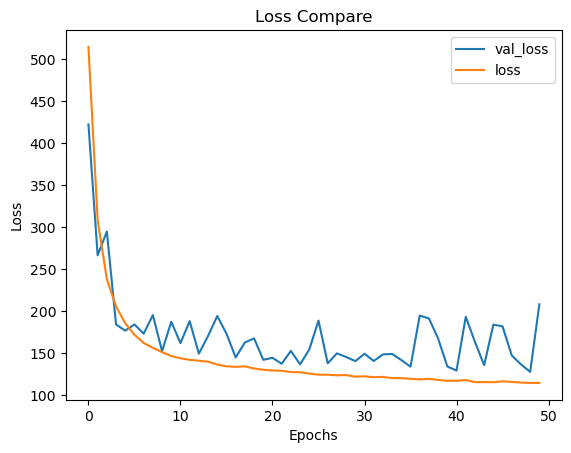

In [93]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss Compare')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['val_loss', 'loss'])
plt.show()

In [50]:
# 예측
y_predict = model.predict(x_test)
y_predict

162/162 [==============================] - 0s 596us/step


array([[1951.797  ],
       [2256.7024 ],
       [2483.6372 ],
       ...,
       [ 382.24326],
       [ 255.39232],
       [ 127.76797]], dtype=float32)

## 6. MSE vs RMSE

### MSE
- MSE는 평균 제곱 오차(Mean Squared Error)의 약어로, 회귀 분석에서 가장 널리 사용되는 손실 함수 중 하나입니다.
- MSE는 예측값과 실제 값 사이의 차이를 제곱하여 평균한 값입니다

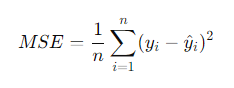
- n은 데이터 포인트의 총 개수입니다.
- yi는 실제 값입니다.
- y^i는 모델의 예측 값입니다. <br><br>

- MSE가 낮을수록 모델의 예측이 실제 값과 가깝다는 것을 의미합니다. 따라서 MSE를 최소화하는 것이 회귀 모델의 목표입니다.
- 예를 들어, 선형 회귀 모델을 학습시킬 때, 훈련 데이터에 대한 예측값과 실제값 간의 차이를 최소화하기 위해 MSE를 손실 함수로 사용할 수 있습니다.
- 최적화 알고리즘은 이 손실 함수를 최소화하도록 모델의 파라미터를 조정합니다.

### RMSE
- RMSE는 평균 제곱근 오차(Root Mean Squared Error)의 약어로, 회귀 분석에서 예측값과 실제 값 사이의 차이를 나타내는 지표입니다.
- MSE와 유사하지만 제곱 오차의 평균을 취한 후에 제곱근을 취한 것입니다.

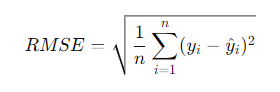
- n은 데이터 포인트의 총 개수입니다.
- yi는 실제 값입니다.
- y^i는 모델의 예측 값입니다. <br><br>

- MSE와 마찬가지로, 선형 회귀 모델을 학습시킬 때 RMSE를 손실 함수로 사용할 수 있습니다.
- 최적화 알고리즘은 이 손실 함수를 최소화하도록 모델의 파라미터를 조정합니다.
- RMSE는 MSE에 비해 제곱한 오차의 크기에 루트를 씌워서 오차를 실제 값과 유사한 단위로 표현하는 장점이 있습니다.

In [55]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [57]:
print("RMSE:", RMSE(y_test, y_predict))

RMSE: 351.4841338768919


## 7. 랜덤 포레스트(Random Forest)
- 앙상블 학습 방법 중 하나로, 의사 결정 트리(Decision Tree)를 기반으로 하는 강력한 머신러닝 알고리즘입니다.
- 랜덤 포레스트는 여러 개의 의사 결정 트리를 훈련하고 그들의 예측을 결합하여 더욱 강력하고 안정적인 예측을 만듭니다.

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)

print('RMSE', RMSE(y_test, rf_result))

RMSE 304.66841611792364


## 8. XGBoost
- "eXtreme Gradient Boosting"의 약자로, 트리 기반의 앙상블 학습 알고리즘 중 하나입니다.
- Gradient Boosting 알고리즘을 기반으로 하지만, 속도와 성능 면에서 향상시킨 알고리즘입니다.
- XGBoost는 대규모 데이터셋과 고차원의 특성을 다루는 데 매우 효율적이며, 많은 머신러닝 대회에서 우승한 기록을 가지고 있습니다.

In [65]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)

print('RMSE', RMSE(y_test, xgb_result))

RMSE 307.09072320247844


## 9. LightGBM
- Microsoft에서 개발한 고성능 그래디언트 부스팅 프레임워크입니다.
- LightGBM은 XGBoost보다 더 빠르고 효율적인 알고리즘을 제공하며, 대규모 데이터셋에서도 뛰어난 성능을 보입니다.
- LightGBM은 특히 대용량 데이터를 다룰 때 메모리 효율성이 뛰어나고, 범주형 특성을 자동으로 처리할 수 있는 기능을 제공하는 등 많은 현대적인 머신러닝 문제에 적합합니다.

In [70]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=100, random_state=42)
lgb.fit(x_train, y_train)
lgb_result = lgb.predict(x_test)

print('RMSE', RMSE(y_test, lgb_result))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 12085, number of used features: 55
[LightGBM] [Info] Start training from score 1077.863798
RMSE 323.2746495922864


## 10. 모델 비교

In [90]:
lgb = pd.DataFrame(lgb_result)
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [91]:
compare['lgb'] = lgb
compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn

compare.head()

,cnt,lgb,xgb,rf,dnn
0,1885,1830.345197,1803.070923,1698.44,1951.796997
1,2175,2133.296789,2228.828125,1756.09,2256.702393
2,2485,2590.899050,2598.814697,2306.91,2483.637207
3,2882,2613.783086,2683.149658,2315.61,2357.491455
4,2965,2306.341169,2590.693848,2287.42,2362.070068


### 커널 밀도 추정(Kernel Density Estimation)
- 데이터의 분포를 부드러운 곡선으로 나타내어 데이터의 분포를 시각적으로 파악할 수 있도록 도와줍니다.

C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\2804809758.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['cnt'], shade=True, color='r', label='cnt')
C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\2804809758.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['lgb'], shade=True, color='g', label='lgb')
C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\2804809758.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['xgb'], shade=True, color='b', label='xgb')
C:\Users\REKOJ\AppData\Local\Temp\ipykernel_19860\2804809758.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

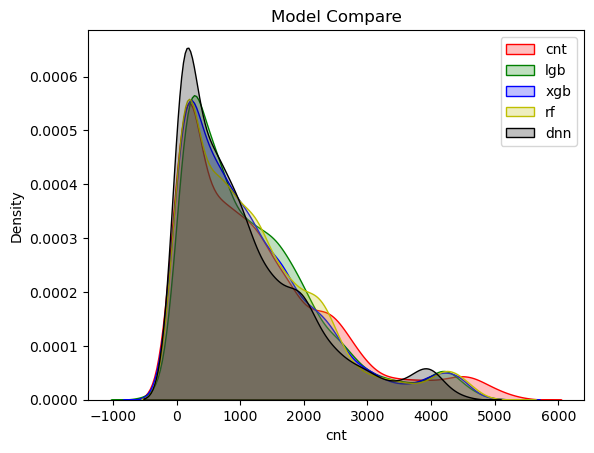

In [98]:
plt.title('Model Compare')

sns.kdeplot(compare['cnt'], shade=True, color='r', label='cnt')
sns.kdeplot(compare['lgb'], shade=True, color='g', label='lgb')
sns.kdeplot(compare['xgb'], shade=True, color='b', label='xgb')
sns.kdeplot(compare['rf'], shade=True, color='y', label='rf')
sns.kdeplot(compare['dnn'], shade=True, color='k', label='dnn')

plt.legend()
plt.show()